<h1 style="text-align:center">Most Streamed Songs in Spotify(2023)</h1>

<h2>Objectives</h2>
<ul>
    <li>Data wrangling</li>
    <li>Data manipulation</li>
    <li>Data modeling</li>
    <li>Data visualization</li>
</ul>

<h2> Table of Contents </h2>
<div class = "alert alert-success">
    <ul>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#business_understanding">Business understanding</a></li>
        <li><a href="#data_preparation">Data preparation</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#deployment">Deployment</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ul>
</div>


<h1 id="introduction">Introduction</h1>

<p style="font-weight:bold; font-size: 18px; text-decoration: underline;">Data-source<p>
<p>URL: <a href="https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data">Most streamed songs Spotify(2023)</a></p>

<h1 id="business_understanding">1. Business understanding</h1>

<p> Analytics in music streaming plays an important role to find, measure, and report the songs, albums, playlists. This helps the user to find the songs, albums, playlists of their choice. Through analyzing the music streaming data, one can easily find the summary, pattern and relationship between the  every songs, it's album and it's playlist. Moreover, this can help the user to identify the information about the artists and their composition for the year </p>

<h1 id="data_preparation">2. Data preparation</h1>

<h3 id="data_cleaning"><u>Data Cleaning</u></h3>

<p> Data cleaning includes handling the missing values, correcting the data formats, reshaping the data, removing leading and trailing whitespaces, filtering the unwanted data from the dataset. </p> 

<p> Importing pandas and numpy libraries, storing the data by reading it from the spotify dataset which is in .csv format, and display the first 5 rows with all its columns </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

data = pd.read_csv("./group_5-most_streamed_songs_spotify_2023.csv")

data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<h5><u>Renaming column names</u></h5>

<p>Since there are some conflicts in uniformity of column names, They are getting replaced with new, relevant column names </p>

In [2]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [3]:
data.rename(columns= {"artist(s)_name" : "artist_name",
                      "streams" : "spotify_streams"}, inplace=True)

data.columns

Index(['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'spotify_streams', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')

<h5><u>Identifying and handling missing values</u></h5>

Getting the total counts of NaN values from each columns with its names

In [4]:
data.isna().sum()

track_name               0
artist_name              0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
spotify_streams          0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

<p>Replacing the empty cells with NaN (Not a number). So, it will be easier to identify the missing values</p>

<p> To cross check the code execution, One of the empty values from the column "in_shazam_charts" have be displayed, which is now replaced as NaN</P>

In [5]:
data.replace("", np.nan, inplace=True)

data.query('track_name == "As It Was"').loc[:,['in_shazam_charts']]

,in_shazam_charts
14,NaN


<h5><u>Removing comma from the object and converting their datatype to integer</u></h5>

In [6]:
# Finding datatypes of every column

data.dtypes

track_name              object
artist_name             object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
spotify_streams         object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [7]:
# Removing the comma from the object in specific columns

data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',', '')
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',', '')


<p>From the above total count of NaN values summary, it is clear that "in_shazam_charts" and "key" columns has some Nan values in it</p>

<p>The values in the column "in_shazam_charts" are discrete in nature. So, NaN values are getting filled with its mean value by assigning zero to convert it datatype</p>

In [8]:
# finding the median value and replacing it with the empty values in "in_shazam_charts" columns

data['in_shazam_charts'].replace(np.NaN, 0, inplace=True)
data["in_shazam_charts"] = data["in_shazam_charts"].astype(np.int64)
in_shazam_charts_median = data['in_shazam_charts'].mean()
data['in_shazam_charts'].replace(0, in_shazam_charts_median, inplace=True)


# Replacing the empty values with a string "unknown_key" denoting its uncertainty

in_key_unknown = "unknown_key"
data['key'].replace(np.nan, in_key_unknown, inplace=True)

<p>Spotify streams has integer values. But, It is defined as object datatype. After analyzing it's column data, we came through some values that aren't integer. Hence, It has to be handled by assigning the mean value of spotify streams. Below are the steps to assign them.</p>

In [9]:
# find the non-numeric value from spotify streams

non_numeric_value_index = []
for x in data['spotify_streams']:
    if(x.isdigit()): #check whether the value is a digit
        pass
    else: 
        non_numeric_value_index.append(data.query('spotify_streams == @x').index[0])
print(non_numeric_value_index)

[574]


In [10]:
# Replacing the non-numeric values with zero in spotify streams

for value in non_numeric_value_index:
    data.loc[value,'spotify_streams'] = 0

In [11]:
# find the mean value for "spotify streams" by changing its type

data["spotify_streams"] = data["spotify_streams"].astype(np.int64)
spotify_streams_mean = data["spotify_streams"].mean()


# Assigning the mean value to the spotify streams zero values

for value in non_numeric_value_index:
    data.loc[value,'spotify_streams'] = spotify_streams_mean

data["spotify_streams"] = data["spotify_streams"].astype(np.int64)

In [12]:
# checking for Nan values

data.isna().sum()

track_name              0
artist_name             0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
spotify_streams         0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

<p>Converting the column datatype for "in_deezer_playlists" and "in_shazam_charts"

In [13]:
data['in_deezer_playlists'] = data['in_deezer_playlists'].astype(np.int64)

data['in_shazam_charts'] = data['in_shazam_charts'].astype(np.int64)

In [102]:
# checking the datatypes of the values

data.dtypes

track_name              object
artist_name             object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
spotify_streams          int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

<h5><u>Removing the duplicates from the dataset</h5></u>

In [14]:
data.drop_duplicates(inplace=True)

<h3 id="data_standardization">Data Standardization</h3>

<p> Data standardization includes processing the data by converting its structure, removing unwanted strings, replacing shorthand expression for large data values </p>

<h5><u>Removing unwanted substring from the dataset</u></h5>

<p>This dataset consists of some substrings that are unicode character "ï¿". This is found in "track_name" and "artist_name" columns</p>

In [15]:
#Replacing the strings with the unicode in track_name and artist_name

data["track_name"] = data["track_name"].str.replace("ï¿½","")
data["track_name"] = data["track_name"].str.replace("ï¿","")
data["artist_name"] = data["artist_name"].str.replace("ï¿½","")
data["artist_name"] = data["artist_name"].str.replace("ï¿","")

<h5><u>Styling and exporting the dataset</h5></u>

In [178]:
# Adding border to header, index and changing its font-weight to bold

data.style.set_table_styles(
    [{'selector': 'th',
      'props': [('font-weight', 'bold'),
                ('border','1px solid black')]}]
)


# exporting the cleaned csv file

data.to_excel("./cleaned_file_group_5.xlsx", index_label="unique_id", sheet_name="spotify_data_2023")

<h1 id="modeling">Modeling</h1>

<h3 id="data_manipulation"><u>Data manipulation</u></h3>

<p>Data manipulation includes finding the descriptive statistics for the quantitative data, analyzing and finding patterns, relationship, and association between two or more relevant column data by grouping them, measuring the data's location, variability, analyzing it's distribution. By manipulating a data, it will produce meaningful insights.</p>

In [17]:
#filter last 5 years
current_year = pd.to_datetime('today').year

filtered_data = data[data['released_year'] >= current_year - 5]

stream = filtered_data['spotify_streams'].tolist()

stream = [float(value) for value in stream if str(value).replace('.', '').isdigit()]

# Convert the list to a NumPy array for calculations
stream_np = np.array(stream)

# Calculate the mean
mean = np.mean(stream_np)

# Calculate the Median
median = np.median(stream_np)

# Print the mean & median
print("Mean Streams (Last 5 Years):", mean)
print("\nMedian Streams (Last 5 Years):", median)

# Group data by 'artist' and calculate the total streams for each artist
artist_streams = filtered_data.groupby('artist_name')['spotify_streams'].sum().reset_index()

# Convert 'streams' column to numeric values for proper sorting
artist_streams['spotify_streams'] = pd.to_numeric(artist_streams['spotify_streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column
artist_streams = artist_streams.dropna(subset=['spotify_streams'])

# Sort the DataFrame by total streams in descending order
sorted_artist_streams = artist_streams.sort_values(by='spotify_streams', ascending=False)

#Sorting: Display the top 5 streamed artists
top_5_artists = sorted_artist_streams.head(5)

print("\nSorting: \nTop 5 Streamed Artists (Last 5 Years):")
print(tabulate(top_5_artists[['artist_name', 'spotify_streams']], headers='keys', tablefmt='pretty', showindex=False))

#Counting: Sum the counts of the 'artist(s)_name' column
artist_counts = filtered_data['artist_name'].value_counts()

# Calculate the total count of unique artists
total_artist_count = artist_counts.sum()

print("\nCounting: \nTotal Artist Count (Overall):", total_artist_count)



Mean Streams (Last 5 Years): 389761427.3851091

Median Streams (Last 5 Years): 236940480.0

Sorting: 
Top 5 Streamed Artists (Last 5 Years):
+----------------+-----------------+
|  artist_name   | spotify_streams |
+----------------+-----------------+
|  Harry Styles  |   11608645649   |
|   Bad Bunny    |   9997799607    |
|   The Weeknd   |   9905514870    |
|  Taylor Swift  |   8608153810    |
| Olivia Rodrigo |   7442148916    |
+----------------+-----------------+

Counting: 
Total Artist Count (Overall): 779


In [19]:
# Filter data for the last 5 years
current_year = pd.to_datetime('today').year
filtered_data = data[data['released_year'] >= current_year - 5]

# Convert 'streams' column to numeric values, handling errors by setting errors='coerce'
filtered_data.loc[:, 'spotify_streams'] = pd.to_numeric(filtered_data['spotify_streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column
filtered_data = filtered_data.dropna(subset=['spotify_streams'])

# Calculate range
data_range = np.ptp(filtered_data['spotify_streams'])

# Calculate variance
variance = np.var(filtered_data['spotify_streams'], ddof=1)

# Calculate standard deviation
std_deviation = np.std(filtered_data['spotify_streams'], ddof=1)

# Calculate coefficient of variation
coefficient_of_variation = (std_deviation / np.mean(filtered_data['spotify_streams'])) * 100

print("Range (Last 5 Years):", data_range)
print("Variance (Last 5 Years):", variance)
print("Standard Deviation (Last 5 Years):", std_deviation)
print("Coefficient of Variation (Last 5 Years):", coefficient_of_variation)


Range (Last 5 Years): 3703892312
Variance (Last 5 Years): 2.0307578612236026e+17
Standard Deviation (Last 5 Years): 450639308.23038536
Coefficient of Variation (Last 5 Years): 115.61926772839041


C:\Users\samue\AppData\Local\Temp\ipykernel_2512\3551276032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'spotify_streams'] = pd.to_numeric(filtered_data['spotify_streams'], errors='coerce')


<h3 id="data_visualization"><u>Data visualization</u></h3>

<p>This represents the data in a graphical or visual formats which could help the decision makers to find the insights effectively. This provides clarity and simplifies the data into a graphical representation. This helps the analysts to create dashboards out of charts, graphs which could empowers them to find the outliers, explore the hidden insights, and identify anomalies, if any </p>

<h5 id="scatter_plot"><u>Scatter plot</u></h5>

<p>Visualizing the distribution of bpm values from 80 to 120 and its danceability value</p>

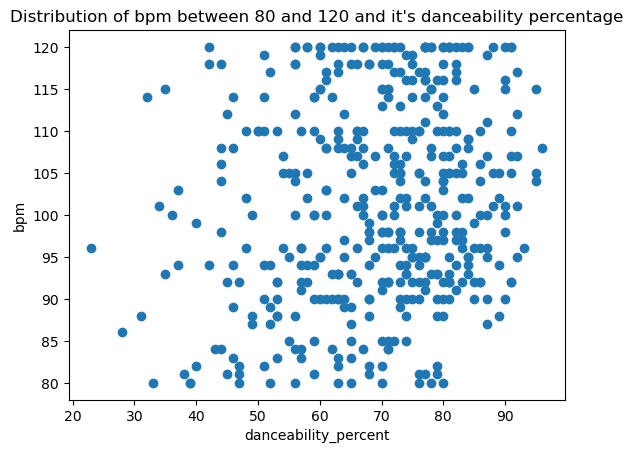

In [20]:
import matplotlib.pyplot as plt

data_copy = data

filtered_scatter_data = data_copy.query('bpm >= 80 and bpm <= 120')

bpm_value = filtered_scatter_data["bpm"]
danceability_value = filtered_scatter_data["danceability_%"]

plt.scatter(danceability_value, bpm_value)

plt.title("Distribution of bpm between 80 and 120 and it's danceability percentage")
plt.xlabel("danceability_percent")
plt.ylabel("bpm")

plt.show()

<h5 id="bar_chart"><u>Bar chart</u></h5>

<p>Visualizing the count of every key of the songs</p>

<Axes: title={'center': "Song's key count"}, xlabel='Keys', ylabel='Counts'>

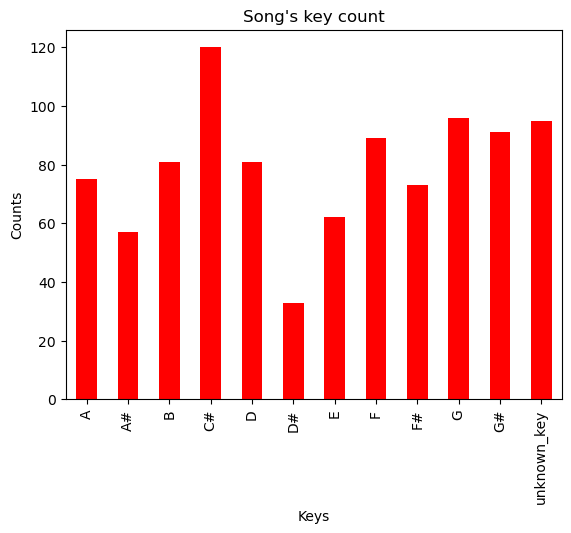

In [21]:
key_value = data_copy["key"]
sorted_keys = key_value.value_counts().sort_index()
sorted_keys.plot(kind="bar", xlabel="Keys", ylabel="Counts", color="red", title="Song's key count")

<h5 id="line_graph"><u>Line graph (Time-series visualization)</u></h5>

<p>Visualizing the count of every key of the songs</p>

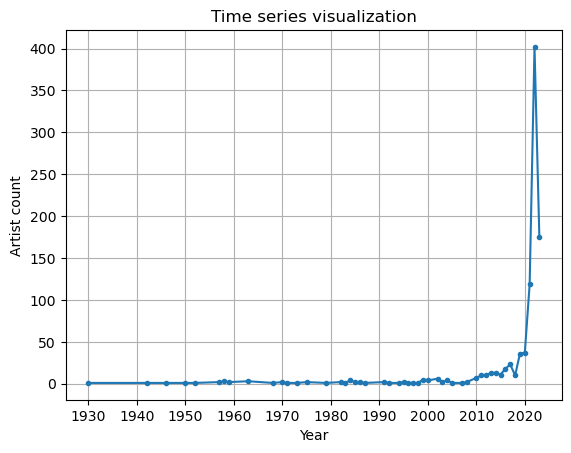

In [22]:
year_wise_count = data_copy.groupby("released_year")["artist_name"].count()

year_wise_count = year_wise_count.to_dict()

years = year_wise_count.keys()
counts = year_wise_count.values()

plt.plot(years, counts, marker= '.')
plt.xticks(range(min(years),max(years), 10))
plt.title("Time series visualization")
plt.xlabel("Year")
plt.ylabel("Artist count")
plt.grid(True)

plt.show()